counts: {'0 0': 1}
[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


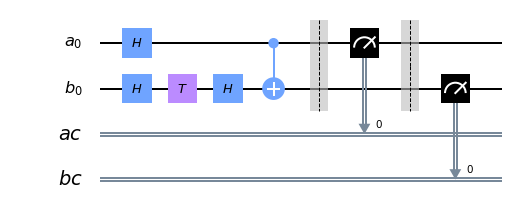

In [2]:
## Programming Quantum Computers
##   by Eric Johnston, Nic Harrigan and Mercedes Gimeno-Segovia
##   O'Reilly Media
##
## More samples like this can be found at http://oreilly-qc.github.io

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
## Uncomment the next line to see diagrams when running in a notebook
#%matplotlib inline

# Example 3-6: Remote Randomness
# Set up the program
a = QuantumRegister(1, name='a')
b = QuantumRegister(1, name='b')
a_c = ClassicalRegister(1, name='ac')
b_c = ClassicalRegister(1, name='bc')
qc = QuantumCircuit(a, b, a_c, b_c)

qc.h(a)
## now prob of a is 50%
qc.h(b)
qc.t(b)
qc.h(b)
## now prob of b is 15%
qc.cx(a, b)        # entangle a and b
## Now, you can read *either*
## qubit and get 50% prob.
## If the result is 0, then
## the prob of the *remaining*
## qubit is 15%, else it's 85%
qc.barrier()
qc.measure(a, a_c)
qc.barrier()
qc.measure(b, b_c)

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

counts = result.get_counts(qc)
print('counts:',counts)

outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)
qc.draw(output='mpl',justify='all')     # draw the circuit
